# Chapter 12: Regression with Time Series Data

How to carry out regression analysis with time series data, what special problems it may have, and how to address those problems



# Key Notes

- In this chapter, the most important features of time series variables are discussed, such as trends, seasonality, random walk, and serial correlation.
- To run a regression of y on x in time series data, the two variables need to be at the same time series frequency

## Trend

- A fundamental feature of time series data is that variables evolve with time. They may hover around a stable average value, or they may drift upwards or downwards
- We say that the trend is linear if the change is the same on average as time passes. We say the trend is exponential if the relative change in the variable is the same on average as time passes. (rel change = perc change)


## Seasonality

- The value of the variable is expected to follow a cyclical pattern, tracking the seasons of the year, days of the week, or hours of the day


## Stationarity, Non-stationarity, Random Walk

Variables in time series data may be non-stationary in several ways. The most common forms of non-stationarity are:

- Trend: expected value increases or decreases with time
- Seasonality: expected value is different in periodically recurring time periods
- Random walk and other unit-root series: variance increases with time


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Tests
from arch.unitroot import PhillipsPerron

### Case Study - Returns on a company Stock and Market Returns

In this case study we examine how returns on the Microsoft company stock are related to the market returns.

In [4]:
stocks_df = pd.read_csv("/workspaces/data-analysis-business-economics-policy/resources/data/chapter_12/ch12/stock-prices-daily.csv")

In [5]:
stocks_df

,date,p_SP500,p_MSFT,year,month
0,1997-12-31,970.429993,16.156250,1997,12
1,1998-01-02,975.039978,16.390625,1998,1
2,1998-01-05,977.070007,16.296875,1998,1
3,1998-01-06,966.580017,16.390625,1998,1
4,1998-01-07,964.000000,16.195313,1998,1
...,...,...,...,...,...
5279,2018-12-24,2351.100098,94.129997,2018,12
5280,2018-12-26,2467.699951,100.559998,2018,12
5281,2018-12-27,2488.830078,101.180000,2018,12
5282,2018-12-28,2485.739990,100.389999,2018,12


Daily Time Series

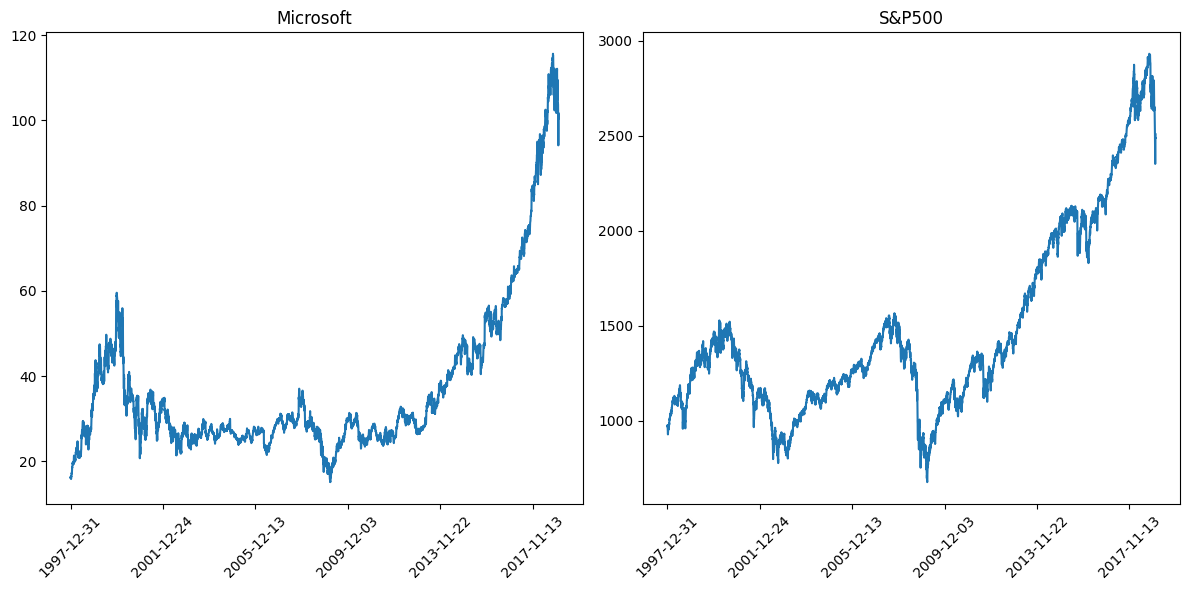

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(stocks_df['date'], stocks_df['p_MSFT'])
ax[1].plot(stocks_df['date'], stocks_df['p_SP500'])

ax[0].set_title('Microsoft')
ax[1].set_title('S&P500')

ax[0].set_xticks(ax[0].get_xticks()[::1000])
ax[1].set_xticks(ax[1].get_xticks()[::1000])

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

Monthly Time Series

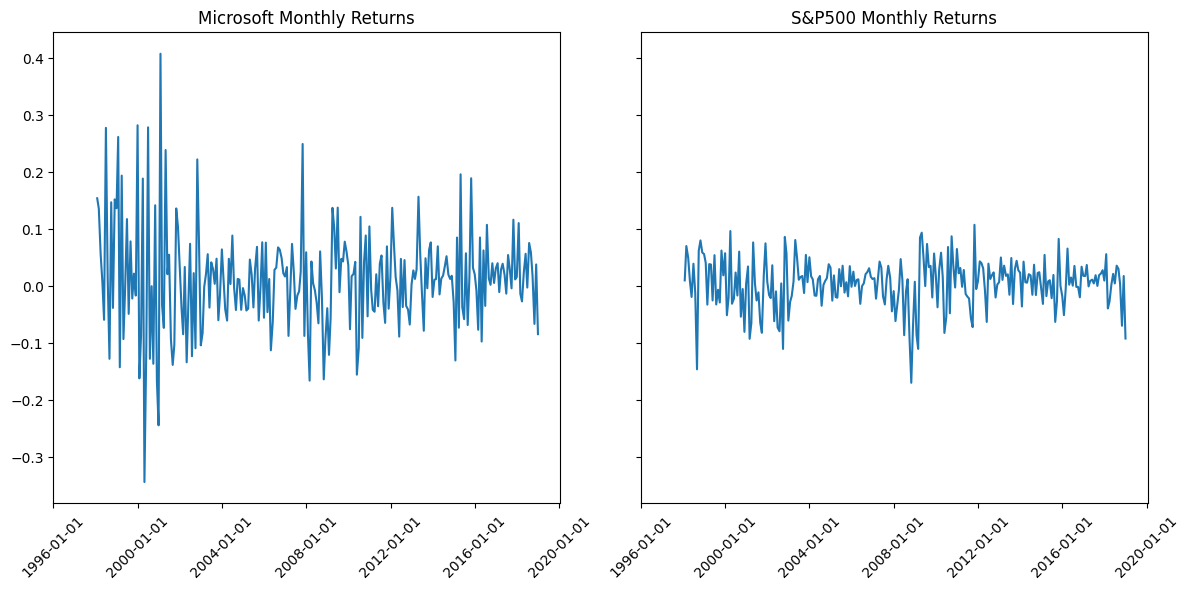

In [64]:
stocks_df['date'] = pd.to_datetime(stocks_df['date'])
temp = stocks_df.groupby(['year', 'month'])['date'].max().reset_index()
monthly_df = pd.merge(temp, stocks_df[['date', 'p_SP500', 'p_MSFT']], how='left', on='date')

monthly_df['msft_perc_change'] = monthly_df['p_MSFT'].pct_change()
monthly_df['sp_perc_change'] = monthly_df['p_SP500'].pct_change()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax[0].plot(monthly_df['date'], monthly_df['msft_perc_change'])
ax[1].plot(monthly_df['date'], monthly_df['sp_perc_change'])

ax[0].set_title('Microsoft Monthly Returns')
ax[1].set_title('S&P500 Monthly Returns')

ax[0].set_xticks(ax[0].get_xticks()[:])
ax[1].set_xticks(ax[1].get_xticks()[:])

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

In [78]:

# Perform the Phillips-Perron test
pp_test = PhillipsPerron(monthly_df["msft_perc_change"][1:])

# Print the test results
print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -19.448
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [76]:

# Perform the Phillips-Perron test
pp_test = PhillipsPerron(monthly_df["sp_perc_change"][1:])

# Print the test results
print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -14.440
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The PP test assesses whether a time series is stationary of follows a unit root

A unit root is a characteristic of a time series where the values of the series follows a random walk